# Trabajo de Fin de grado

# Nivel 1: Pruebas con la categoría maestra

Primera version realizada de un clasificador para el dataset de kaggle. Se trata de una prueba inicial, que evolucionará a un mejor proyecto a medida que suba el nivel.

## Paso 1: Importación de librería e inicialización de variables globales


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import PIL
from PIL import Image
import pandas as pd
import os
#import cv2
import time
import copy

In [2]:
from torchvision import models
from torch.optim import lr_scheduler
import torch.optim as optim
import skopt

In [3]:
from livelossplot import PlotLosses

In [6]:
DATA_PATH = "C:/Users/Asus/Documents/4Informatica/TFT/Dataset/fashion-dataset/"
img_width, img_height, _ = 32, 32, 3
image_size = (img_width, img_height)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=False, expand=False, center=None),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

---

## Paso 2: La clase Dataset  
---

La clase TheDataset será la encargada no solo de cargar los datos sino de facilitar su acceso a ellos.  

En este caso se clasificará por la categoría maestra.

In [4]:
class TheDataset(Dataset):
    def __init__(self,transform=None,division=None):
        self.path= "C:/Users/Asus/Documents/4Informatica/TFT/Dataset/fashion-dataset/"
        self.file_list = pd.read_csv(self.path + "styles.csv", error_bad_lines=False)
        self.file_list['image'] =self.file_list.apply(lambda row: self.path + "/images/"+ str(row['id']) + ".jpg", axis=1)
        self.file_list = self.file_list.reset_index(drop=True)
        self.division = division
        self.classes= tuple(self.file_list[division].unique())
        self.transform = transform
        self.chargeTheDataset()
        self.chargedInVGG = False
        self.PreResults = []


    def __len__(self):
        return len(self.file_list)

    def __getitem__(self,idx):
        if !self.chargedInVGG:
            return self.file_list[idx]
        else:
            return self.VGGResults[idx]
    def chargePreResults(self,theNet):
        
        
    def chargeTheDataset(self):
        cont = 0
        files=[]
        for index, row in self.file_list.iterrows():
            if cont % 5 == : 
                print(cont)
            if not os.path.isfile(row['image']) : continue
            img = Image.open(row['image'])
            imgAndClass = []
            imgAndClass.append(img)
            if self.transform:
                imgAndClass[0]= self.transform(img)
            imgAndClass.append(self.classes.index(row[self.division]))
            imgAndClass.append(row['image'])
            files.append(imgAndClass)
            cont += 1
    

        self.file_list = files
        



SyntaxError: invalid syntax (<ipython-input-4-9f4385e52d48>, line 19)

### Creación del objeto theDataset y de su dataloader

El dataloader ayudará a la posterior red neuronal a coger los datos del dataset.

In [6]:
theDataset = TheDataset(transform=transform,division="subCategory")

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

999
1999
2999
3999
4999
5999
6999
7999
8999
9999
10999
11999
12999
13999
14999
15999
16999
17999
18999
19999
20999
21999
22999
23999
24999
25999
26999
27999
28999
29999
30999
31999
32999
33999
34999
35999
36999
37999
38999
39999
40999
41999
42999
43999


In [7]:
#DATALOADER
shuffle = True
batch_size = 4
num_workers = 0
dataloader = DataLoader(dataset=theDataset,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)

#test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (30000, len(theDataset)-30000))
test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (30000, len(theDataset)-30000))
testLoader = DataLoader(dataset=test_ds,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)
validLoader = DataLoader(dataset=valid_ds,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)

In [8]:
#Pruebas del dataset
print(len(theDataset))
print(len(dataloader))
print(len(test_ds))
print(len(valid_ds))
print(len(testLoader))
print(len(validLoader))
print(theDataset.classes)
print(len(theDataset.classes))
theDataset[2][2]

44419
11105
30000
14419
7500
3605
('Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts', 'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories', 'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails', 'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets', 'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup', 'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories', 'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves', 'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles', 'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands', 'Vouchers')
45


'C:/Users/Asus/Documents/4Informatica/TFT/Dataset/fashion-dataset//images/59263.jpg'

---
## Paso 3: La estructura de la red- La Clase Net
---

In [9]:

class Net (nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #self.conv1 = nn.Conv2d(3,6,5)
        #self.conv2 = nn.Conv2d(6,16,5)
        self.conv1 = nn.Conv2d(3,6,3)
        #30x30x6
        self.pool1 = nn.MaxPool2d(2,2)
        #15x15x6
        self.conv2 = nn.Conv2d(6,16,2)
        #14x14x16
        self.conv3 = nn.Conv2d(16,32,5)
        #10x10x16
        self.fc1 = nn.Linear(32*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,len(theDataset.classes))

    def forward(self,x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool1(F.relu(self.conv3(x)))
        x = x.view(-1,32*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Creación de la red neuronal

Creamos la red neuronal e introducimos los criterios que tendrán en cuenta para los errores.

In [10]:
net = Net()


In [8]:
net.load_state_dict(torch.load("./datos"))

cuda:0


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#device = torch.device("cpu")
net.to(device)




criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

cuda:0


## Paso 4: Entrenamiento (FASE DE PRUEBAS)
---

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#device = torch.device("cpu")
net.to(device)
oldLabels = []
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(testLoader, 0):
        inputs, labels, paths = data[0].to(device), data[1].to(device), data[2]
        optimizer.zero_grad()  # Reiniciamos el parámetro gradiente del optimizador
        # Forward + backward + optimización
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Imprimimos los resultados
        running_loss += loss.item()
        if i % 300 == 299:  ##Imprime cada 2000 batches
            print('[%d,%5d] loss : %.3f' %
                  (epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0
print('Entrenamiento finalizado')

cuda:0
[1,  300] loss : 0.125
[1,  600] loss : 0.140
[1,  900] loss : 0.147
[1, 1200] loss : 0.119
[1, 1500] loss : 0.118
[1, 1800] loss : 0.122
[1, 2100] loss : 0.153
[1, 2400] loss : 0.159
[1, 2700] loss : 0.164
[1, 3000] loss : 0.130
[1, 3300] loss : 0.140
[1, 3600] loss : 0.150
[1, 3900] loss : 0.137
[1, 4200] loss : 0.098
[1, 4500] loss : 0.208
[1, 4800] loss : 0.189
[1, 5100] loss : 0.181
[1, 5400] loss : 0.169
[1, 5700] loss : 0.191
[1, 6000] loss : 0.224
[1, 6300] loss : 0.201
[1, 6600] loss : 0.162
[1, 6900] loss : 0.227
[1, 7200] loss : 0.136
[1, 7500] loss : 0.154
Entrenamiento finalizado


---
## Paso 5: Resultados (FASE DE PRUEBAS)
---

In [20]:
torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
correct = 0
total = 0
with torch.no_grad():
    cont = 0
    for data in validLoader:
        images, labels, paths = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        cont += 1
    print(cont)
print('Precision de la red en el dataset imagenes de tests: %d %%' % (100 * correct / total))
    

3605
Precision de la red en el dataset imagenes de tests: 88 %


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
lengu = len(theDataset.classes)
class_correct = list(0. for i in range(lengu))
class_total = list(0. for i in range (lengu))
with torch.no_grad():
    for data in validLoader:
        images, labels,paths = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs,1);
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            if(len(labels) < 4): continue
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] +=1

for i in range(lengu):
  print('Accuracy of %5s : %2d %%' % (
  theDataset.classes[i],100 * class_correct[i]/(max(class_total[i],1))), "Total = ", class_total[i])

Accuracy of Topwear : 96 % Total =  4924.0
Accuracy of Bottomwear : 89 % Total =  885.0
Accuracy of Watches : 92 % Total =  823.0
Accuracy of Socks : 81 % Total =  229.0
Accuracy of Shoes : 91 % Total =  2436.0
Accuracy of Belts : 94 % Total =  256.0
Accuracy of Flip Flops : 83 % Total =  331.0
Accuracy of  Bags : 93 % Total =  994.0
Accuracy of Innerwear : 81 % Total =  556.0
Accuracy of Sandal : 63 % Total =  307.0
Accuracy of Shoe Accessories : 20 % Total =  5.0
Accuracy of Fragrance : 79 % Total =  337.0
Accuracy of Jewellery : 87 % Total =  346.0
Accuracy of  Lips : 85 % Total =  175.0
Accuracy of Saree : 87 % Total =  132.0
Accuracy of Eyewear : 96 % Total =  360.0
Accuracy of Nails : 89 % Total =  96.0
Accuracy of Scarves : 51 % Total =  49.0
Accuracy of Dress : 40 % Total =  154.0
Accuracy of Loungewear and Nightwear : 42 % Total =  150.0
Accuracy of Wallets : 75 % Total =  311.0
Accuracy of Apparel Set : 61 % Total =  31.0
Accuracy of Headwear : 77 % Total =  96.0
Accuracy of 

In [ ]:
torch.save(net.state_dict(), "./datos")

## Pruebas del autor

In [25]:

def imshow(img):
    img = img /2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()


In [4]:
device = torch.device("cpu")
netPr.to(device)
dataiter = iter(validLoader)
images,labels = dataiter.next()
images, labels = images.to(device), labels.to(device)
imshow(torchvision.utils.make_grid(images))
outputs = netPr(images)
print('GroundTruth: ', ' '.join('%5s' % theDatasetPr.classes[labels[j]] for j in range(4)))
_, predicted = torch.max(outputs,1)

print('Predicted',' '.join('%5s' % theDatasetPr.classes[predicted[j]] for j in range(4)))

NameError: name 'netPr' is not defined

# Nivel 2: Clasificación por subCategoría.


En esta versión ya se han implementado formas más robustas de realizar cada paso, así como procediendo a una mejor explicación. **Para ejecutar esta versión debe haber previamente importado lo usado en los primeros bloques de código de este documento.**

### Primer Paso: Preparar los parámetros necesarios para importar el dataset
Se introducen los parámetros necesarios para poder tratar las imágenes cuando estas sean usadas. La variable transform guarda los cambios que se realizarán sobre cada imagen:  
- Redimensionamiento y recorte para adaptarlo a la dimensión de entrada del modelo VGG (224x224).  
- Aleatoriamente dará la vuelta horizontalmente a las imágenes.  
- Aleatoriamente girará ligeramente las imágenes.
- Normalización de los datos generados de leer las imágenes.

In [4]:
DATA_PATH = "/storage/datasets/fashion-dataset/"
img_width, img_height, _ = 32, 32, 3
image_size = (img_width, img_height)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=False, expand=False, center=None),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Dataset
El dataset se guarda en un objeto del tipo dataset y cuenta con el siguiente grupo de variables:
- *path*: El path del dataset original.
- *file_list*: la lista de imágenes que se pueden leer.
- *division*: la categoría por la que se dividen.
- *transform*: el transformador que actua sobre sus imágenes.
- *chargedInVgg*: boolean para indicar si salen de el las imágenes o los resultados de pasar las imágenes por la parte convolutiva.
- *PreResults*: resultados de pasar las imágenes por la parte convolutiva.
El dataset se inicia pasandole un objeto transform y el campo por el que se clasificarán. Al cargarlo, se comprobará la fiabilidad de las imágenes.  
Para obtener los resultados de pasarla por la parte convolutiva de la VGG (o por una parte de la red) hay que ejecutar la función preNet de la clase, que pasándole la parte convolutiva de la red se encargará de ello. Podemos con la función changeSource(bool) especificar que valores queremos obtener del dataset, si las imágenes (bool = False) o los resultados de pasar por la parte de la red con anterioridad (bool = True).

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

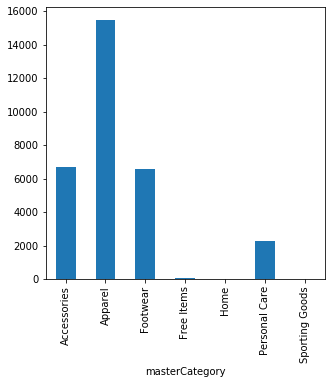

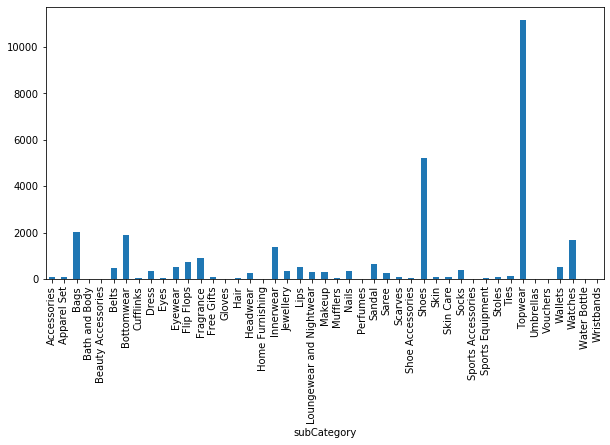

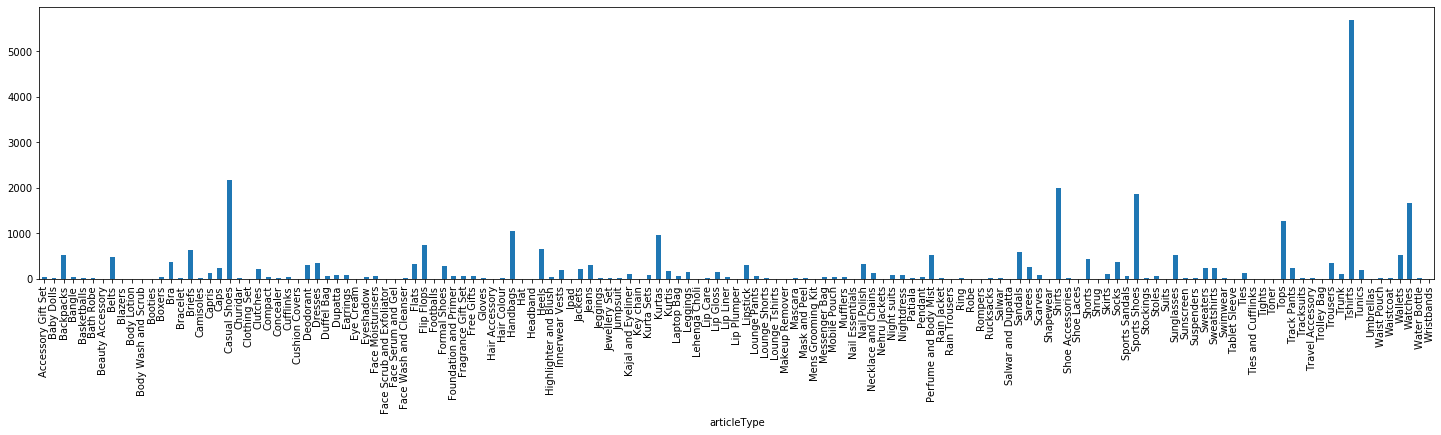

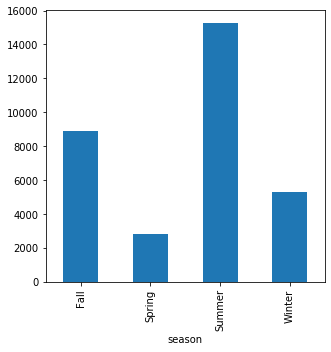

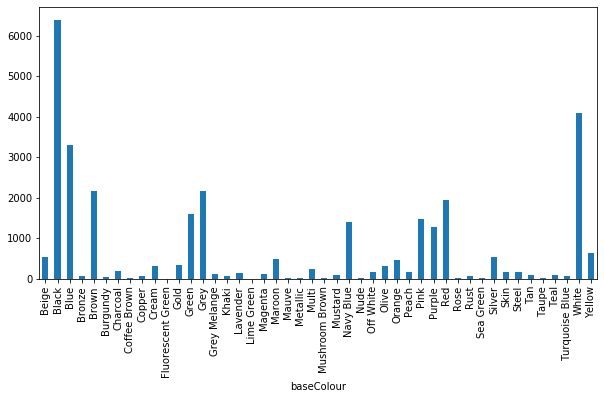

In [100]:
df = pd.read_csv(DATA_PATH + "styles.csv", error_bad_lines=False)
df.groupby('masterCategory')['productDisplayName'].nunique().plot(kind='bar',figsize=(5,5))
plt.show()
df.groupby('subCategory')['productDisplayName'].nunique().plot(kind='bar',figsize=(10,5))
plt.show()
df.groupby('articleType')['productDisplayName'].nunique().plot(kind='bar',figsize=(25,5))
plt.show()
df.groupby('season')['productDisplayName'].nunique().plot(kind='bar',figsize=(5,5))
plt.show()
df.groupby('baseColour')['productDisplayName'].nunique().plot(kind='bar',figsize=(10,5))
plt.show()

In [5]:
class TheDataset(Dataset):
    def __init__(self,transform=None,division=None):
        self.path= DATA_PATH
        self.file_list = pd.read_csv(self.path + "styles.csv", error_bad_lines=False)
        self.file_list['image'] =self.file_list.apply(lambda row: self.path + "/images/"+ str(row['id']) + ".jpg", axis=1)
        self.file_list = self.file_list.reset_index(drop=True)
        self.division = division
        self.classes= tuple(self.file_list[division].unique())
        self.transform = transform
        self.tryDataset()
        self.chargedInVGG = 0
        self.PreResults = []

    def __len__(self):
        return len(self.file_list)
    
        
    def __getitem__(self,idx):
        if self.chargedInVGG==0:
            row = self.file_list[idx]
            imageClass = self.classes.index(row[self.division])
            image = Image.open(row['image'])
            if self.transform:
                    image= self.transform(image)
            return image, imageClass 
            #return self.file_list[idx]
        #else:
        #    return self.PreResults[idx][0], self.PreResults[idx][1]
        else:
            row = self.file_list[idx]
            imageClass = self.classes.index(row[self.division])
            if self.chargedInVGG == 1:
                return  torch.load(row['midConvolutive']), imageClass
            elif self.chargedInVGG == 2:
                return torch.load(row['completeConvolutive']), imageClass
    
    def tryDataset(self):
        cont = 0
        files=[]
        for index, row in self.file_list.iterrows():
            if not os.path.isfile(row['image']) : continue
            #if index == 100: break;
            '''img = Image.open(row['image'])
            imgAndClass = []
            imgAndClass.append(img)
            if self.transform:
                imgAndClass[0]= self.transform(img)
            
            imgAndClass.append(self.classes.index(row[self.division]))
            imgAndClass.append(row['image'])
            '''
            files.append(row)
            cont += 1
    

        self.file_list = files
    def changeSource(self,mode):
        #mode 0: get image; mode 1: get midConvolutive result; mode 2: get completeConvolutive result
        self.chargedInVGG = mode
    
    def preparationForPreConvolutive(self,mode):
        if mode == 1:
            for index in range(len(self.file_list)):
                self.file_list[index]['midConvolutive'] = "/storage/midConvolutiveResults/file" + str(index);
        elif mode == 2:
            for index in range(len(self.file_list)):
                self.file_list[index]['completeConvolutive'] = "/storage/convolutiveResults/file" + str(index);
    #def PreNet(self, notClassNet):
    #    files = []
    #    count = 0
    #    
    #    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #    print(device)
    #    notClassNet.to(device)
    #    notClassNet.cuda()
    #    with torch.no_grad():
    #        for index in range(len(self.file_list)):
    #            if index % 5000 == 0: 
    #                print(index)
    #            imgAndClass = []
    #            theImg,theClass = self.__getitem__(index)
    #            theImg = torch.tensor([theImg.tolist()])
    #            theImg = theImg.to(device) 
    #            output = notClassNet(theImg)
    #            output = torch.flatten(output, 1)
    #            #output = alsoNotClassNet(output)
    #            output = torch.tensor(output.tolist()[0])
    #            imgAndClass.append(output)
    #            imgAndClass.append(theClass)
    #            files.append(imgAndClass)
    #            torch.cuda.empty_cache()
    #        self.PreResults = files
    #
    #def preNet(self, notClassNet):
    #    self.PreResults = []
    #    count = 0
    #    
    #    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #    print(device)
    #    notClassNet.to(device)
    #    notClassNet.cuda()
    #    with torch.no_grad():
    #        for index in range(len(self.file_list)):
    #            if index % 1000 == 0: 
    #                print(index)
    #            
    #            imgAndClass = []
    #            theImg,theClass = self.__getitem__(index)
    #            theImg = torch.tensor([theImg.tolist()])
    #            theImg = theImg.to(device) 
    #            output = notClassNet(theImg)
    #            #output = torch.flatten(output, 1)
    #            #output = alsoNotClassNet(output)
    #            output = torch.tensor(output.tolist()[0])
    #            imgAndClass.append(output)
    #            imgAndClass.append(theClass)
    #            self.PreResults.append(imgAndClass)
    #            torch.cuda.empty_cache()
    def completePreNet(self, notClassNet):
        #DATA_PATH = "/storage/datasets/fashion-dataset/"
        files = []
        count = 0
        
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print(device)
        notClassNet.to(device)
        notClassNet.cuda()
        with torch.no_grad():
            for index in range(len(self.file_list)):
                if index % 5000 == 0: 
                    print(index)
                imgAndClass = []
                theImg,theClass = self.__getitem__(index)
                theImg = torch.tensor([theImg.tolist()])
                theImg = theImg.to(device) 
                output = notClassNet(theImg)
                output = torch.flatten(output, 1)
                output = torch.tensor(output.tolist()[0])
                torch.save(output,"/storage/convolutiveResults/file" + str(index) );
                #imgAndClass.append(output)
                #imgAndClass.append(theClass)
                #files.append(imgAndClass)
                self.file_list[index]['completeConvolutive'] = "/storage/convolutiveResults/file" + str(index);
                torch.cuda.empty_cache()
            #self.PreResults = files
        torch.cuda.empty_cache()
            
    def midPreNet(self, notClassNet):
        count = 0
        
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print(device)
        notClassNet.to(device)
        notClassNet.cuda()
        with torch.no_grad():
            for index in range(len(self.file_list)):
                if index % 1000 == 0: 
                    print(index)
                
                imgAndClass = []
                theImg,theClass = self.__getitem__(index)
                theImg = torch.tensor([theImg.tolist()])
                theImg = theImg.to(device) 
                output = notClassNet(theImg)
                #output = torch.flatten(output, 1)
                #output = alsoNotClassNet(output)
                output = torch.tensor(output.tolist()[0])
                torch.save(output,"/storage/midConvolutiveResults/file" + str(index) );
                #imgAndClass.append(output)
                #imgAndClass.append(theClass)
                #self.PreResults.append(imgAndClass)
                self.file_list[index]['midConvolutive'] = "/storage/midConvolutiveResults/file" + str(index);
                torch.cuda.empty_cache()
        torch.cuda.empty_cache()
        

In [6]:
theDatasetPr = TheDataset(transform=transform,division="articleType")#"masterCategory")

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [11]:
print(theDatasetPr.classes)

('Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Leggings', 

### Dataloader
#### Ejemplo de creación
El dataloader será el que proporcionará los distintos elementos del dataset al modelo de la red, además de dividirlos en entrenamiento y validación y configurar los parámetros de tamaño de batch y la aleatoriedad de los elementos del dataset.

In [7]:
#DATALOADER
shuffle = True
batch_size = 64
num_workers = 0
trainSize = 30000
#trainSize = 50
valSize = len(theDatasetPr)-trainSize
dataloader = DataLoader(dataset=theDatasetPr,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)

test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (trainSize, valSize))
testLoader = DataLoader(dataset=test_ds,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)
validLoader = DataLoader(dataset=valid_ds,
                        shuffle=shuffle,
                        batch_size=batch_size,
                        num_workers=num_workers)
dataloaders = {'train': testLoader, 'val': validLoader}
dataset_sizes = {'train': trainSize, 'val': valSize}

#Pruebas del dataset
print(len(theDatasetPr))
print(len(dataloader))
print(len(test_ds))
print(len(valid_ds))
print(len(testLoader))
print(len(validLoader))
print(theDatasetPr.classes)
print(len(theDatasetPr.classes))
#theDataset2[2][2]

44419
695
30000
14419
469
226
('Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Tie

#### Guardado y carga de los dataloaders.
Para usar siempre la misma configuración de entrenamiento podemos guardar los dataloaders y volverlos a usar más adelante.

In [13]:
#Save dataloader
torch.save(dataloaders['train'], './testLoader.pth')
torch.save(dataloaders['val'], './validLoader.pth')

In [29]:
#Load model
dataloaders['train'] = torch.load('./testLoader.pth')
dataloaders['val'] = torch.load('./validLoader.pth')

## Modelo de red
#### Ejemplo de creación
Para crear el modelo, primero obtenemos un modelo ya entrenado de VGG poniendo el require_grad a false para que el entrenamiento no afecte sobre ellos.
Cambiamos la última capa de la neurona para adecuarla a nuestro número de clases, conservando el resto de la parte clasificadora y movemos la red a cuda.

#### Guardado y carga del entrenamiento
Es posible guardar y cargar los valores de la red tras su entrenamiento para usarlos más adelante.

In [7]:
#del netPr
#torch.cuda.empty_cache() 
netPr = models.vgg16_bn(pretrained=True)
#netPr = models.vgg19_bn(pretrained=True)
#No entrenamos la red vgg
cont = 0
for param in netPr.features.parameters():
    if (cont < 37):
        param.require_grad = False
        print(cont)
    cont += 1
#print(netPr)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [8]:


# Las nuevas capas que creemos tendrán require_grad = true por defecto = se entrenarán
#nFeats= netPr.fc.in_features
# Quitamos la última capa para cambiarlo por la salida con las 45 clases de las subCategorías
#feats = list(net.classifier.children())[:-1] 
#feats.extend([nn.Linear(nFeats, len(theDatasetPr.classes))])
# Cambiamos el clasificador
#netPr.classifier = nn.Sequential(*feats) 

nFeats = netPr.classifier[6].in_features
feats = list(netPr.classifier.children())[:-1]
feats.extend([ nn.Linear(nFeats, len(theDatasetPr.classes))])
netPr.classifier = nn.Sequential(*feats)
#netPr = netPr.to(device)
netPr.cuda()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
netPr.to(device)

criterion = nn.CrossEntropyLoss()
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer= optim.SGD(netPr.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

cuda:0


In [ ]:
torch.save(netPr.state_dict(), "./datosPruebaVGG")

In [10]:
#netPr.load_state_dict(torch.load("./datosPruebaVGG"))
netPr.load_state_dict(torch.load("./mejorActual"))

<All keys matched successfully>

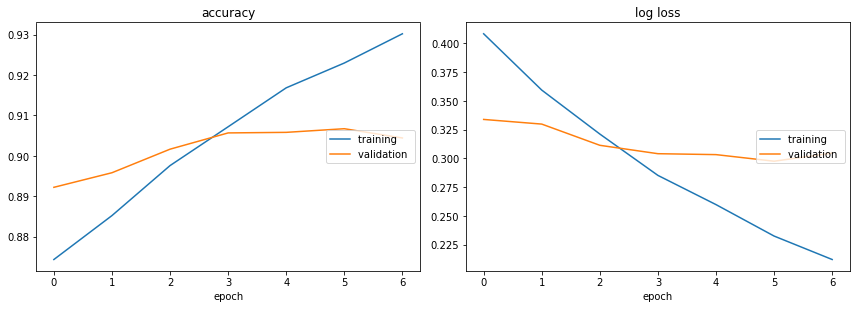

accuracy
	training         	 (min:    0.874, max:    0.930, cur:    0.930)
	validation       	 (min:    0.892, max:    0.907, cur:    0.904)
log loss
	training         	 (min:    0.212, max:    0.408, cur:    0.212)
	validation       	 (min:    0.298, max:    0.334, cur:    0.305)
Epoch 7/9
----------


In [ ]:
classNet,loss = train_model(netPr, criterion, optimizer, exp_lr_scheduler,dataloaders,dataset_sizes,num_epochs=10)

### Entrenamiento de la red
Pasándole los parámetros necesarios realizamos un entrenamiento en el cual para cada época se entrena y se valida la red, mostrando los resultados de pérdida y precisión para cada caso. Se ha incorporado la librería liveloss para poder mostrar estos resultados como gráficas de los resultados a tiempo real. 
La función guardará la red que mejores resultados haya obtenido y no cambiará hasta encontrar una que mejore su ejecución en la validación.
Al finalizar, devuelve el modelo más óptimo obtenido, así como la media de las perdidas obtenidas, que tiene su uso a la hora de buscar los hiperparámetros óptimos.

In [36]:
def train_model(model, thecriterion, theoptimizer, thescheduler,dataloaders=None,dataset_sizes=None, num_epochs=25):
    since = time.time()
    liveloss = PlotLosses()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_loss = 1000000.0
    the_loss = []
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        logs={}
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            batchCont = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                theoptimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = thecriterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        theoptimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                batchCont+=1
                #if batchCont % int((dataset_sizes[phase]/64)/4) == int((dataset_sizes[phase]/64)/4) - 1:
                #    print(phase + " - Loss: " + str(loss.item() * inputs.size(0)) + "Batch = " + str(batchCont))
                if batchCont % 50 == 0: 
                    print("batch = ",batchCont)
            if phase == 'train':
                thescheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            prefix = ''
            if phase == 'val':
                prefix = 'val_'

            logs[prefix + 'log loss'] = epoch_loss
            logs[prefix + 'accuracy'] = epoch_acc

            #print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            #    phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                #best_model_wts = copy.deepcopy(model.state_dict())
                #torch.save(model.state_dict(), "./mejorActual")
                #the_loss.append(epoch_loss)
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), "./mejorActual")
            if phase == 'val':
                liveloss.update(logs)
                liveloss.send()
        #print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, best_loss #np.mean(the_loss)

In [43]:
print(next(netPr.parameters()).is_cuda)

True


In [10]:
#netPr = train_model(netPr, criterion, optimizer, exp_lr_scheduler,
#                       num_epochs=2)
print(len(theDatasetPr.classes))

143


### Testeo
Una vez entrenada la red, podemos obtener la precisión usando el método probing(), aunque dado que esto ya lo realiza el propio entrenamiento, la función más útil sería class_success, que dado el modelo, muestra la precisión del modelo para clasificar cada clase de las que tiene en el conjunto de validación (así como presenta el número de muestras que tiene en el conjunto de esa clase).

In [39]:

def probing(model,dataloaders):
    correct = 0
    total = 0
    #classNet = nn.Sequential(*list(model.children())[2])
    model.to(device)
    print(device)
    #netPr.eval()
    with torch.no_grad():
        cont = 0
        for data in dataloaders['val']:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs =model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            cont += 1
        print(cont)
    print('Precision de la red en el dataset imagenes de tests: %d %%' % (100 * correct / total))
probing(classNet.eval(),dataloads)


cuda:0
451
Precision de la red en el dataset imagenes de tests: 84 %


In [8]:
def class_success_val(model,dataloaders):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #netPr.to(device)
    lengu = len(theDatasetPr.classes)
    class_correct = list(0. for i in range(lengu))
    class_total = list(0. for i in range (lengu))
    with torch.no_grad():
        for data in dataloaders['val']:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = classNet(images)
            _, predicted = torch.max(outputs,1);
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                #if(len(labels) < 4): continue
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] +=1

    #for i in range(lengu):
    #  print('Accuracy of %5s : %2d %%' % (
    #      theDatasetPr.classes[i],100 * class_correct[i]/(max(class_total[i],1))), "Total = ", class_total[i])
    return class_correct,class_total


In [9]:
def class_success_train(model,dataloaders):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #netPr.to(device)
    lengu = len(theDatasetPr.classes)
    class_correct = list(0. for i in range(lengu))
    class_total = list(0. for i in range (lengu))
    with torch.no_grad():
        for data in dataloaders['train']:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = classNet(images)
            _, predicted = torch.max(outputs,1);
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                #if(len(labels) < 4): continue
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] +=1

    #for i in range(lengu):
    #  print('Accuracy of %5s : %2d %%' % (
    #      theDatasetPr.classes[i],100 * class_correct[i]/(max(class_total[i],1))), "Total = ", class_total[i])
    return class_correct, class_total


### Total de elementos

In [10]:
def class_success_total(dataloaders):
    lengu = len(theDatasetPr.classes)
    class_total = list(0. for i in range (lengu))
    with torch.no_grad():
        for data in dataloaders['train']:
            _, labels = data
            for i in range(len(labels)):
                label = labels[i]
                class_total[label] +=1
        for data in dataloaders['val']:
            _, labels = data
            for i in range(len(labels)):
                label = labels[i]
                class_total[label] +=1
    #for i in range(lengu):
    #    print(theDatasetPr.classes[i],"    Total = ", class_total[i])
    return class_total
def class_success(dataloaders):
    correctVal, totalVal = class_success_val(classNet,dataloaders)#createDataloader(batch_size = 64, num_workers = 0, trainSize = 30000))
    print(" ")
    correctTrain, totalTrain = class_success_train(classNet,dataloaders) #createDataloader(batch_size = 64, num_workers = 0, trainSize = 30000))
    print(" ")
    totalClass = class_success_total(dataloaders)#createDataloader(batch_size = 64, num_workers = 0, trainSize = 30000))
    #print("Clase\t\t\tTotal\t\t\tPrecision Val\t\t\tPrecision Train\t\t\tTotal Val\t\t\tTotal Train")
    for i in range(len(theDatasetPr.classes)):
        print(
          theDatasetPr.classes[i], "\t\t\t",totalClass[i] ,
            "\t\t\n Val%",
            (100 * correctVal[i]/(max(totalVal[i],1))),
            "\t\t   Train%",
            (100 * correctTrain[i]/(max(totalTrain[i],1))),
            "\t\t   VT",
            totalVal[i],
            "\t\t   TT",
            totalTrain[i], 
            "\n"
            )
#class_success(dataloads)

## Preparcación de los datos.
Pasaremos las imágenes por la parte convolutiva de la red para obtener sus resultados.

In [11]:
class specialVGG (nn.Module):
    def __init__(self,net):
        super(specialVGG,self).__init__()
        self.features = net.features[:-7]
        self.newFeatures = net.features[-7:]
        for param in self.newFeatures.parameters():
            param.require_grad = True
        self.avgpool = net.avgpool
        self.classifier = net.classifier
    def forward(self,x):
        x = self.newFeatures(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [8]:
##print(netPr)
##
thenotClassNet = nn.Sequential(*list(netPr.children())[:-1])
###alsoNotClassNet = list(netPr.children())[1]
#print(notClassNet)
#
#
theclassNet = nn.Sequential(*list(netPr.children())[2])
#print(classNet)
#xxx = specialVGG(netPr)
#xxx.to(device)
#xxx.cuda
#xxx.eval
theDatasetPr.changeSource(0)
#notClassNet = nn.Sequential(*list(xxx.children())[0])
#print(notClassNet)
theDatasetPr.completePreNet(thenotClassNet)
#theDatasetPr.oldPreNet(notClassNet)
theDatasetPr.changeSource(2)
    

NameError: name 'netPr' is not defined

In [31]:
##print(netPr)
##
thenotClassNet = nn.Sequential(*list(netPr.children())[:-1])
###alsoNotClassNet = list(netPr.children())[1]
#print(notClassNet)
#
#
theclassNet = nn.Sequential(*list(netPr.children())[2])
#print(classNet)
xxx = specialVGG(netPr)
xxx.to(device)
xxx.cuda
xxx.eval
theDatasetPr.changeSource(0)
thenotClassNet = nn.Sequential(*list(xxx.children())[0])
print(thenotClassNet)
theDatasetPr.midPreNet(thenotClassNet)
#theDatasetPr.oldPreNet(notClassNet)
theDatasetPr.changeSource(1)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [12]:
theDatasetPr.changeSource(0)
theDatasetPr.preparationForPreConvolutive(2)
theDatasetPr.changeSource(2)

KeyboardInterrupt: 

In [13]:
theDatasetPr.changeSource(0)
theDatasetPr.preparationForPreConvolutive(1)
theDatasetPr.changeSource(1)

In [51]:
theDatasetPr[20]

(tensor([0.0000, 0.0000, 0.2390,  ..., 0.7185, 0.2627, 0.7738]), 2)

### Funciones de creación de dataloaders, de parámetros de entrenamiento y del modelo.

In [30]:
#DATALOADER
def createDataloader(batch_size = 4, num_workers = 0, trainSize = 30000):
    #shuffle = True
    shuffle = False
    #batch_size = 4
    #num_workers = 0
    #trainSize = 30000
    valSize = len(theDatasetPr)-trainSize
    #dataloader = DataLoader(dataset=theDatasetPr,
    #                        shuffle=shuffle,
    #                        batch_size=batch_size,
    #                        num_workers=num_workers)

    #test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (trainSize, valSize))
    #test_ds, valid_ds = torch.utils.data.split(dataloader.dataset, (trainSize, valSize))
    testLoader = DataLoader(dataset=test_ds,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_workers)
    validLoader = DataLoader(dataset=valid_ds,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_workers)
    print(validLoader.batch_size)
    dataloaders = {'train': testLoader, 'val': validLoader}
    dataset_sizes = {'train': trainSize, 'val': valSize}
    return dataloaders,dataset_sizes
#def resetNetModel():
    
def createTrainingError(model,lr=0.001):
    criterion = nn.CrossEntropyLoss()
    # Observe that only parameters of final layer are being optimized as
    # opposed to before.
    optimizer= optim.SGD(model.parameters(), lr, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    return criterion,optimizer,exp_lr_scheduler

def createModel(dropout=0.5):
    
    newModels = models.vgg16_bn(pretrained=True)
    #No entrenamos la red vgg
    for param in newModels.features.parameters():
        param.require_grad = False

    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    newModels.to(device)
    
    nFeats = newModels.classifier[6].in_features
    #nFeats = newModels.classifier[-1].in_features
    feats = list(newModels.classifier.children())[:-4]
    #feats = list(newModels.classifier.children())[:-1]
    #nFeats = newModels.classifier[0].in_features
    feats.extend([ nn.Linear(nFeats, len(theDatasetPr.classes))])

    
    feats[2] = nn.Dropout(p=dropout, inplace=False)
    #feats[5] = nn.Dropout(p=dropout, inplace=False)
    #feats.extend([ nn.Linear(nFeats, 3045),nn.Dropout(p=dropout, inplace=False),nn.ReLU(inplace=True)
    #              ,nn.Linear(3045, 2025),nn.Dropout(p=dropout, inplace=False),nn.ReLU(inplace=True)
    #              ,nn.Linear(2025, len(theDatasetPr.classes))])
    newModels.classifier = nn.Sequential(*feats)
    #netPr = netPr.to(device)
    newModels.cuda()
    
    return newModels

def newCreateModel(dropout=0.5):
    #newModels = models.vgg16_bn(pretrained=True)
    #nFeats = newModels.classifier[6].in_features
    #feats = list(netPr.classifier.children())[:-1]
    #feats.extend([ nn.Linear(nFeats, len(theDatasetPr.classes))])
    #newModels.classifier = nn.Sequential(*feats)

    newModels = specialVGG(createModel(dropout))
    newModels.cuda()
    return newModels;
    #newModels = models.vgg16_bn(pretrained=True)
    ##No entrenamos la red vgg
    #for param in newModels.features.parameters():
    #    param.require_grad = False
    #
    #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #print(device)
    #newModels.to(device)
    #
    #nFeats = newModels.classifier[6].in_features
    #feats = list(newModels.classifier.children())[:-1]
    #feats.extend([ nn.Linear(nFeats, len(theDatasetPr.classes))])
    #feats[2] = nn.Dropout(p=dropout, inplace=False)
    #feats[5] = nn.Dropout(p=dropout, inplace=False)
    #newModels.classifier = nn.Sequential(*feats)
    ##netPr = netPr.to(device)
    #newModels = specialVGG(newModels)
    #
    #newModels.cuda()
    #return newModels

#Pruebas del dataset
#print(len(theDatasetPr))
#print(len(dataloader))
#print(len(test_ds))
#print(len(valid_ds))
#print(len(testLoader))
#print(len(validLoader))
#print(theDatasetPr.classes)
#print(len(theDatasetPr.classes))
#theDataset2[2][2]

In [15]:
print(classNet)
print(classNet[2].type)

NameError: name 'classNet' is not defined

## Ejecución

In [16]:
trainSize= 30000
shuffle = True
batch_size = 32
num_workers = 0
valSize = len(theDatasetPr)-trainSize
dataloader = DataLoader(dataset=theDatasetPr,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_workers)
test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (trainSize, valSize))
dataloads, dataset_sis = createDataloader(batch_size = batch_size, num_workers = 0, trainSize= trainSize)#trainSize = 30000)


32


In [21]:
print(len(dataloads['val']))

451


In [37]:
torch.cuda.reset_max_memory_allocated()
torch.cuda.reset_max_memory_cached()

classNets = None
#classNets = createModel(0.5)
#classNet = nn.Sequential(*list(classNets.children())[2])
classNet = newCreateModel(0.5)

#dataloads, dataset_sis = createDataloader(batch_size = 64, num_workers = 0, trainSize = 30000)

crit,opts, exp_lr_scheds = createTrainingError(classNet,lr=0.003920274771701523)

classNet.eval()





cuda:0


specialVGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(1

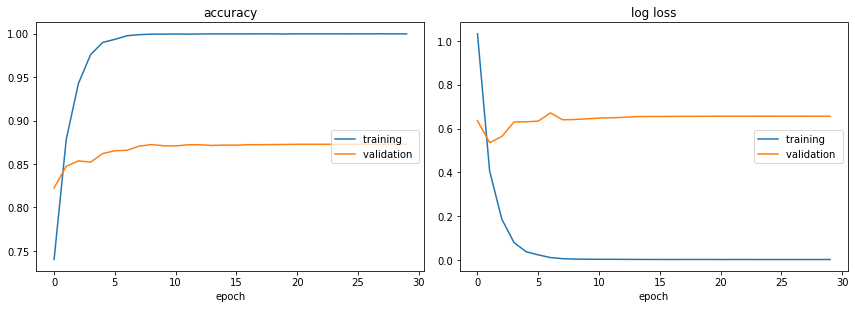

accuracy
	training         	 (min:    0.670, max:    1.000, cur:    1.000)
	validation       	 (min:    0.823, max:    0.873, cur:    0.873)
log loss
	training         	 (min:    0.002, max:    1.449, cur:    0.003)
	validation       	 (min:    0.531, max:    0.972, cur:    0.657)
Training complete in 64m 16s
Best val Acc: 0.872807


In [38]:
#### dataloads = {'train': dataloads['val'], 'val':dataloads['train']}
theDatasetPr.changeSource(1);
crit,opts, exp_lr_scheds = createTrainingError(classNet,lr=0.003920274771701523)
classNet,loss = train_model(classNet, crit, opts, exp_lr_scheds,dataloads,dataset_sis,num_epochs=30)

In [40]:
torch.save(classNet.state_dict(), "./datosVGG_sarticleType32_2netsmidConvV3")

In [18]:
classNet.load_state_dict(torch.load("./datosVGG_subCategory")) #Debe ser de tipo specialVgg

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "0.bias", "3.weight", "3.bias". 
	Unexpected key(s) in state_dict: "features.0.weight", "features.0.bias", "features.1.weight", "features.1.bias", "features.1.running_mean", "features.1.running_var", "features.1.num_batches_tracked", "features.3.weight", "features.3.bias", "features.4.weight", "features.4.bias", "features.4.running_mean", "features.4.running_var", "features.4.num_batches_tracked", "features.7.weight", "features.7.bias", "features.8.weight", "features.8.bias", "features.8.running_mean", "features.8.running_var", "features.8.num_batches_tracked", "features.10.weight", "features.10.bias", "features.11.weight", "features.11.bias", "features.11.running_mean", "features.11.running_var", "features.11.num_batches_tracked", "features.14.weight", "features.14.bias", "features.15.weight", "features.15.bias", "features.15.running_mean", "features.15.running_var", "features.15.num_batches_tracked", "features.17.weight", "features.17.bias", "features.18.weight", "features.18.bias", "features.18.running_mean", "features.18.running_var", "features.18.num_batches_tracked", "features.20.weight", "features.20.bias", "features.21.weight", "features.21.bias", "features.21.running_mean", "features.21.running_var", "features.21.num_batches_tracked", "features.24.weight", "features.24.bias", "features.25.weight", "features.25.bias", "features.25.running_mean", "features.25.running_var", "features.25.num_batches_tracked", "features.27.weight", "features.27.bias", "features.28.weight", "features.28.bias", "features.28.running_mean", "features.28.running_var", "features.28.num_batches_tracked", "features.30.weight", "features.30.bias", "features.31.weight", "features.31.bias", "features.31.running_mean", "features.31.running_var", "features.31.num_batches_tracked", "features.34.weight", "features.34.bias", "features.35.weight", "features.35.bias", "features.35.running_mean", "features.35.running_var", "features.35.num_batches_tracked", "newFeatures.37.weight", "newFeatures.37.bias", "newFeatures.38.weight", "newFeatures.38.bias", "newFeatures.38.running_mean", "newFeatures.38.running_var", "newFeatures.38.num_batches_tracked", "newFeatures.40.weight", "newFeatures.40.bias", "newFeatures.41.weight", "newFeatures.41.bias", "newFeatures.41.running_mean", "newFeatures.41.running_var", "newFeatures.41.num_batches_tracked", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias". 

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=143, bias=True)
)


In [35]:
print(loss)
class_success(dataloads)

0.6995981844443456
 
 
Shirts 			 3215.0 		
 Val% 97.41379310344827 		   Train% 100.0 		   VT 1044.0 		   TT 2171.0 

Jeans 			 608.0 		
 Val% 91.28205128205128 		   Train% 100.0 		   VT 195.0 		   TT 413.0 

Watches 			 2542.0 		
 Val% 98.83990719257541 		   Train% 100.0 		   VT 862.0 		   TT 1680.0 

Track Pants 			 304.0 		
 Val% 76.53061224489795 		   Train% 100.0 		   VT 98.0 		   TT 206.0 

Tshirts 			 7066.0 		
 Val% 94.65311533362792 		   Train% 100.0 		   VT 2263.0 		   TT 4803.0 

Socks 			 686.0 		
 Val% 96.98492462311557 		   Train% 100.0 		   VT 199.0 		   TT 487.0 

Casual Shoes 			 2845.0 		
 Val% 81.8848167539267 		   Train% 100.0 		   VT 955.0 		   TT 1890.0 

Belts 			 813.0 		
 Val% 99.21875 		   Train% 100.0 		   VT 256.0 		   TT 557.0 

Flip Flops 			 914.0 		
 Val% 90.07633587786259 		   Train% 100.0 		   VT 262.0 		   TT 652.0 

Handbags 			 1759.0 		
 Val% 93.6842105263158 		   Train% 100.0 		   VT 570.0 		   TT 1189.0 

Tops 			 1762.0 		
 Val% 74.6240601503759

## Optimización de hiperparámetros
Declaramos el espacio de búsqueda y la función objetivo a minimizar y finalmente imprimimos los resultados para obtener los valores óptimos.

In [26]:
SPACE = [
   skopt.space.Real(0.001, 0.05, name='learning_rate', prior='log-uniform') #0.001
   ,skopt.space.Integer(25, 64, name='the_batch_size'),
   skopt.space.Real(0.1, 0.9, name='dropout') 
]

In [27]:
## PARA MAÑANA COGER TRAIN_DS Y VALID_DS Y SACARLOS DEL MÉTODO PARA TENER YA SEPARADOS LOS COJUNTOS DE DATOS. LUEGO CON ESO 
## PODEMOS CAMBIAR EL BATCH_SIZE AL CARGARLOS EN LOS DATALOADERS 
def objective(params):
    torch.cuda.reset_max_memory_allocated()
    torch.cuda.reset_max_memory_cached()
    print(params)
    learning_rate  = params[0]
    the_batch_size = int(params[1])
    dropout = params[2]
    #classNet = createModel()
    #classNet = nn.Sequential(*list(classNet.children())[2])
    dataloas, dataset_sis = createDataloader(batch_size = the_batch_size, num_workers = 0, trainSize = 30000)
    #createTrainingError(classNet,lr=learning_rate)
    #classNet,loss = train_model(classNet, criterion, optimizer, exp_lr_scheduler,dataloaders,dataset_sizes,num_epochs=2)
    classNets = None
    classNets = createModel(dropout)
    classNet = nn.Sequential(*list(classNets.children())[2])

    
    
    crit,opts, exp_lr_scheds = createTrainingError(classNet,lr=learning_rate)
    
    classNet,loss = train_model(classNet, crit, opts, exp_lr_scheds,dataloads,dataset_sis,num_epochs=10)
    print(loss)
    return loss

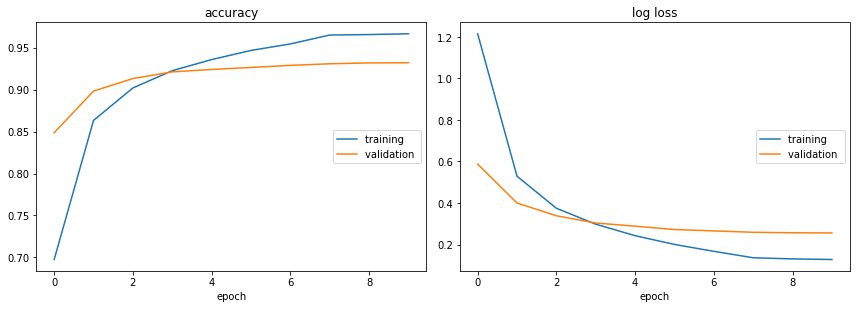

accuracy
	training         	 (min:    0.338, max:    1.000, cur:    0.967)
	validation       	 (min:    0.350, max:    0.945, cur:    0.932)
log loss
	training         	 (min:    0.002, max:    1.215, cur:    0.128)
	validation       	 (min:    0.248, max:    0.588, cur:    0.256)
Training complete in 3m 40s
Best val Acc: 0.932103
0.2558497565479581


In [28]:
#dataloads, dataset_sis = createDataloader(batch_size = 64, num_workers = 0, trainSize = 30000)
valSize = len(theDatasetPr)-trainSize
dataloader = DataLoader(dataset=theDatasetPr,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_workers)
test_ds, valid_ds = torch.utils.data.random_split(dataloader.dataset, (trainSize, valSize))
results = skopt.forest_minimize(objective, SPACE,n_calls=10)


In [29]:
print(results)


          fun: 0.24789328859102727
    func_vals: array([3.00321474e-01, 3.07487706e-01, 2.93404083e-01, 2.99515453e-01,
       3.11585319e-01, 2.89569149e-01, 2.47893289e-01, 1.00000000e+06,
       2.57635079e-01, 2.55849757e-01])
       models: [ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_samples_leaf=3,
                    min_samples_split=2, min_variance=0.0,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                    oob_score=False, random_state=1860657894, verbose=0,
                    warm_start=False)]
 random_state: RandomState(MT19937) at 0x7F078411F888
        space: Space([Real(low=0.001, high=0.05, prior='log-uniform', transform='identity'),
       Integer(low=25, high=64, prior='uniform', transform='identity'),
       Real(low=0.1, high=0.9, prior='uniform', transform='identity')])
        specs